# Aproksymacja średniokwadratowa funkcjami trygonometrycznymi

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable

## Bartosz Kucharz

# Funkcja zadana do analizy

$$k=3\\
m=0.2\\
f(x)=\sin\left(\frac{xk}{\pi}\right)e^{\frac{-mx}{\pi}}
$$

In [68]:
A = -np.pi*np.pi
B = 2*np.pi*np.pi

def f8(x):
    k=3
    m=0.2
    return np.sin(x*k/np.pi)*np.exp(-m*x/np.pi)

In [69]:
def get_nodes(function, n, nodes_func):
    x = nodes_func(A, B, n)
    y = np.vectorize(function)(x)
    return x, y

def  uniform_nodes(a, b, n):
    return np.linspace(a, b, n)

def chebyshev_nodes(a, b, n):
    return np.vectorize(lambda x : 0.5*(a+b) + .5*(b-a)*np.cos((2*x - 1)*np.pi/(2*n)))(np.arange(1, n+1))

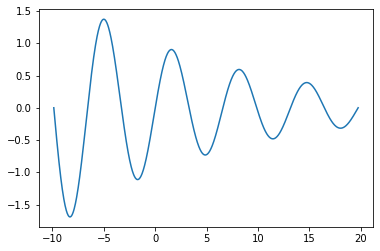

In [70]:
X, Y = get_nodes(f8, 1000, uniform_nodes)
plt.plot(X, Y)

# Błąd przybliżenia
$$\frac{1}{n} \left | \left | F(x)-f(x)   \right | \right | = \frac{1}{n}\sum_{i=0}^n w(x_i)[F(x_i)-f(x_i)]^2$$


# Ekperymenty

In [71]:
def trigonometric_approx(x, y, n, degree, A, B, w=None):
    if w is None:
        w = np.ones(x.shape)
        
    
    matrix = np.array([[A, 1], [B, 1]])
    free = np.array([0, 2*np.pi])
    a1, b1 = np.linalg.solve(matrix, free)
    v = a1*x + b1
    
    
    L = v.shape[0]/2
    j = np.arange(degree)
    a = 1/L*np.sum(y*np.cos(j[:,None]*v), axis=1)
    b = 1/L*np.sum(y*np.sin(j[:,None]*v), axis=1)
    
    def nf(x):
        j = np.arange(1,a.shape[0])
        return 1/2*a[0] + np.sum(a[1:]*np.cos(j*x) + b[1:]*np.sin(j*x))
    
    
    nx = np.linspace(A, B, 1000)
    nv = a1*nx  + b1
    ny = np.vectorize(nf)(nv)
    
    e_y = np.vectorize(nf)(v)
    error = y - e_y
    error = np.power(error, 2)
    error = np.mean(error)
    
    return nx, ny, error

In [72]:
def test_approx(f, nodes_no, degrees):
    table = PrettyTable()
    table.field_names = ['Liczba węzłów', 'Liczba funkcji bazowych', 'Błąd przybliżenia']
    
    for node_no in nodes_no:
        for degree in degrees:
            if degree == node_no:
                break
            
            x, y = get_nodes(f, node_no, uniform_nodes)
            nx, ny, error = trigonometric_approx(x, y, 1000, degree, A, B)
            table.add_row([node_no, degree, round(error, 15)])
            
    print(table)

In [73]:
test_approx(f8, [5, 10, 15, 25, 50, 100, 200], range(1, 9))

+---------------+-------------------------+-------------------+
| Liczba węzłów | Liczba funkcji bazowych | Błąd przybliżenia |
+---------------+-------------------------+-------------------+
|       5       |            1            | 0.122993678334601 |
|       5       |            2            |  0.02042473353802 |
|       5       |            3            | 0.014796802440083 |
|       5       |            4            | 0.066902152133445 |
|       10      |            1            |        0.0        |
|       10      |            2            |        0.0        |
|       10      |            3            |        0.0        |
|       10      |            4            |        0.0        |
|       10      |            5            |        0.0        |
|       10      |            6            |        0.0        |
|       10      |            7            |        0.0        |
|       10      |            8            |        0.0        |
|       15      |            1          

## Liczba węzłów 10

Błąd przybliżenia 3.8214e-32


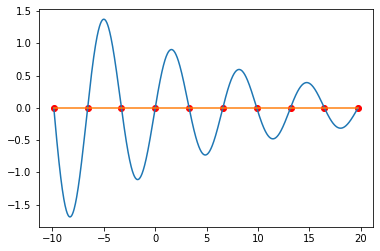

In [75]:
X,Y = get_nodes(f8, 1000, uniform_nodes)
x, y = get_nodes(f8, 10, uniform_nodes)
nx, ny , error = trigonometric_approx(x, y, 1000, 5, A, B)

plt.plot(X, Y)
plt.scatter(x, y, c='red')
plt.plot(nx, ny)

print(f'Błąd przybliżenia {error:.5}')

W powyższym przypadku dla liczby węzłów równej 10, węzły niefortunnie ułożyły się prawie w lini prostej, przez co błąd przybliżenia dla 10 węzłów wyniósł 0.

## Wybrane wykresy

### Liczba węzłow 15, liczba funkcji bazowych 5

Błąd przybliżenia 0.29


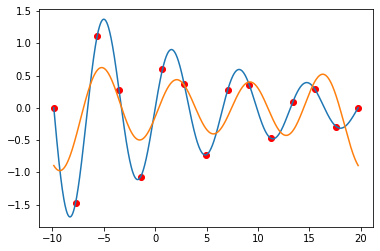

In [77]:
X,Y = get_nodes(f8, 1000, uniform_nodes)
x, y = get_nodes(f8, 15, uniform_nodes)
nx, ny , error = trigonometric_approx(x, y, 1000, 5, A, B)

plt.plot(X, Y)
plt.scatter(x, y, c='red')
plt.plot(nx, ny)

print(f'Błąd przybliżenia {error:.5}')

### Liczba węzłow 15, liczba funkcji bazowych 8

Błąd przybliżenia 0.012872


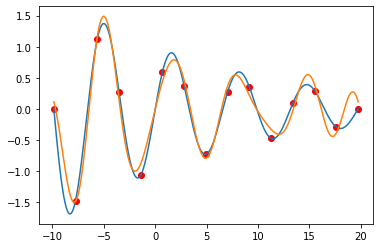

In [79]:
X,Y = get_nodes(f8, 1000, uniform_nodes)
x, y = get_nodes(f8, 15, uniform_nodes)
nx, ny , error = trigonometric_approx(x, y, 1000, 8, A, B)

plt.plot(X, Y)
plt.scatter(x, y, c='red')
plt.plot(nx, ny)

print(f'Błąd przybliżenia {error:.5}')

### Liczba węzłow 100, liczba funkcji bazowych 8

Błąd przybliżenia 0.0088435


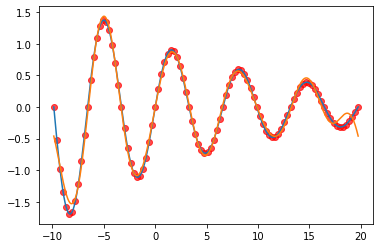

In [81]:
X,Y = get_nodes(f8, 1000, uniform_nodes)
x, y = get_nodes(f8, 100, uniform_nodes)
nx, ny , error = trigonometric_approx(x, y, 1000, 8, A, B)

plt.plot(X, Y)
plt.scatter(x, y, c='red', alpha=.7)
plt.plot(nx, ny)

print(f'Błąd przybliżenia {error:.5}')

Zależności między liczbą węzłów i liczbą funkcji bazowych a dokładnością przybliżenia są takie same jak w przypadku aproksymacji wielomianami algebraicznymi. Tzn. zwiększenie liczby funkcji bazowych zwiększa dokładność aproksymacji natomiast liczba węzłów nie ma wpływu na błąd przybliżenia.

Ze względu na okresowość funkcji trygonometrycznych oraz fakt, że zadana funkcja ma różne pochodne na końcach przedziałów na końcu prawego przedziału można zaobserwować rozbieżność funkcji aproksymującej z funkcją zadaną.